In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize

In [2]:
walking_files = ['Activity-Data/Walking/01/Walking01Pressure.csv', 'Activity-Data/Walking/2/Walking2Pressure.csv', 
                 'Activity-Data/Walking/3/Walking3Pressure.csv', 'Activity-Data/Walking/04/Walking04Pressure.csv',
                 'Activity-Data/Walking/5/Walking5Pressure.csv']

In [3]:
climbing_files = ['Activity-Data/Climbing_Stairs/1/Climbing_Stairs1Pressure.csv', 'Activity-Data/Climbing_Stairs/2/Climbing_Stairs2Pressure.csv', 
                 'Activity-Data/Climbing_Stairs/3/Climbing_Stairs3Pressure.csv', 'Activity-Data/Climbing_Stairs/5/Climbing_Stairs5Pressure.csv',
                 'Activity-Data/Climbing_Stairs/6/Climbing_Stairs6Pressure.csv', 'Activity-Data/Climbing_Stairs/7/Climbing_Stairs7Pressure.csv']

In [12]:
downstairs_files = ['Activity-Data/Downstairs/1/Downstairs1Pressure.csv', 'Activity-Data/Downstairs/2/Downstairs2Pressure.csv', 
                 'Activity-Data/Downstairs/3/Downstairs3Pressure.csv', 'Activity-Data/Downstairs/4/Downstairs4Pressure.csv',
                 'Activity-Data/Downstairs/5/Downstairs5Pressure.csv', 'Activity-Data/Downstairs/6/Downstairs6Pressure.csv']

In [5]:
walking_list = []
for walking_file in walking_files:
    df = pd.read_csv(walking_file, delimiter=',', header=0)
    walking_list.append(df)
walking_frame = pd.DataFrame()
walking_frame = pd.concat(walking_list)
walking_frame.head()

,timestamp,pressure,UUID
0,1503925783809,963.727173,1b63307ec4900338
1,1503925785588,963.747253,1b63307ec4900338
2,1503925786383,963.760925,1b63307ec4900338
3,1503925786681,963.762085,1b63307ec4900338
4,1503925786897,963.759583,1b63307ec4900338


884


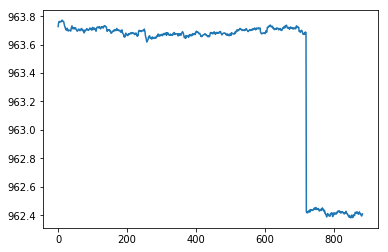

In [6]:
print(len(walking_frame))
plt.plot(walking_frame[' pressure'].values)

In [7]:
climb_list = []
for climbing_file in climbing_files:
    df = pd.read_csv(climbing_file, delimiter=',', header=0)
    climb_list.append(df)
climb_frame = pd.DataFrame()
climb_frame = pd.concat(climb_list)
print(len(climb_frame))
climb_frame.head()

377


,timestamp,pressure,UUID
0,1503926233330,963.686096,1b63307ec4900338
1,1503926233527,963.686096,1b63307ec4900338
2,1503926233726,963.682556,1b63307ec4900338
3,1503926233921,963.684448,1b63307ec4900338
4,1503926234223,963.679504,1b63307ec4900338


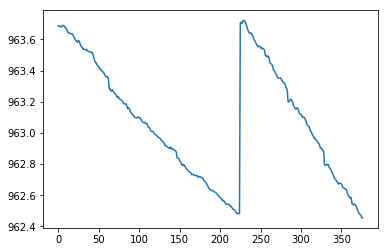

In [8]:
plt.plot(climb_frame[' pressure'].values)

In [13]:
down_list = []
for down_file in downstairs_files:
    df = pd.read_csv(down_file, delimiter=',', header=0)
    down_list.append(df)
down_frame = pd.DataFrame()
down_frame = pd.concat(down_list)
print(len(down_frame))
down_frame.head()

256


,timestamp,pressure,UUID
0,1503926415557,962.443542,1b63307ec4900338
1,1503926415848,962.440186,1b63307ec4900338
2,1503926416247,962.434021,1b63307ec4900338
3,1503926416544,962.442627,1b63307ec4900338
4,1503926417035,962.446777,1b63307ec4900338


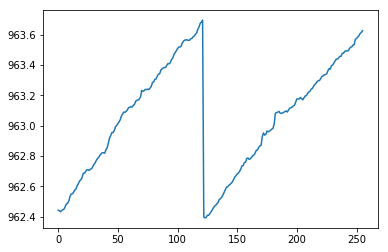

In [14]:
plt.plot(down_frame[' pressure'].values)

In [15]:
def create_sliding_windows_by_time(data_frame, window_time_period=3000):
    windows = []
    ts_windows = []
    ts_begin = None
#     window_time_period = 3000
    for row in data_frame.iterrows():
    #     print("Col1", type(row[1][1]))
    #     print("Col2", type(row[1][0]))
        if ts_begin == None:
    #         print(1)
            ts_begin = row[1][0]
            window = []
            ts_window = []
            window.append(row[1][1])
            ts_window.append(row[1][0])
        elif(row[1][0] <= (ts_begin + window_time_period)):
            window.append(row[1][1])
            ts_window.append(row[1][0])
        else:
            windows.append(window)
            ts_windows.append(ts_window)
            window = [row[1][1]]
            ts_window = [row[1][0]]
            ts_begin = row[1][0]
    ts_windows.append(ts_window)
    windows.append(window)
    # windows = windows[1:]
    # ts_windows = ts_windows[1:]
    print(len(ts_windows),len(windows))
    return windows, ts_windows

In [16]:
w_windows, w_ts_windows = create_sliding_windows_by_time(walking_frame,3000)
c_windows, c_ts_windows = create_sliding_windows_by_time(climb_frame,3000)
d_windows, d_ts_windows = create_sliding_windows_by_time(down_frame,3000)

59 59
29 29
27 27


In [17]:
len_w_windows = []
len_c_windows = []
len_d_windows = []
for window in w_windows:
    len_w_windows.append(len(window))
for window in c_windows:
    len_c_windows.append(len(window))
for window in d_windows:
    len_d_windows.append(len(window))

In [18]:
print(len_c_windows, len_w_windows, len_d_windows)

[13, 19, 16, 15, 16, 13, 20, 19, 16, 18, 19, 20, 19, 2, 10, 14, 13, 10, 12, 10, 11, 9, 10, 5, 9, 11, 11, 10, 7] [4, 15, 18, 16, 16, 19, 13, 18, 15, 7, 30, 21, 23, 19, 15, 18, 18, 16, 13, 19, 24, 14, 14, 14, 17, 17, 6, 21, 24, 18, 23, 25, 20, 7, 10, 18, 2, 15, 19, 16, 15, 16, 15, 14, 3, 10, 14, 13, 12, 13, 13, 12, 13, 15, 15, 12, 12, 9, 1] [7, 12, 11, 8, 6, 11, 13, 2, 9, 13, 11, 14, 5, 11, 10, 10, 7, 9, 7, 6, 18, 2, 11, 12, 14, 12, 5]


In [ ]:
for ts_window in w_ts_windows:
    print(ts_window)

In [19]:
walking_frame['label'] = 0
climb_frame['label'] = 1
down_frame['label'] = 2
print(climb_frame.tail())
print(walking_frame.tail())
print(down_frame.tail())

        timestamp    pressure             UUID   label
43  1503926625986  962.478088  1b63307ec4900338      1
44  1503926626184  962.476685  1b63307ec4900338      1
45  1503926626682  962.473755  1b63307ec4900338      1
46  1503926626981  962.455505  1b63307ec4900338      1
47  1503926627374  962.454102  1b63307ec4900338      1
         timestamp    pressure             UUID   label
159  1503926687534  962.399292  1b63307ec4900338      0
160  1503926687934  962.394958  1b63307ec4900338      0
161  1503926688153  962.395081  1b63307ec4900338      0
162  1503926688525  962.405029  1b63307ec4900338      0
163  1503926688826  962.408813  1b63307ec4900338      0
        timestamp    pressure             UUID   label
49  1503926812832  963.583496  1b63307ec4900338      2
50  1503926813127  963.592468  1b63307ec4900338      2
51  1503926813327  963.607849  1b63307ec4900338      2
52  1503926813679  963.613464  1b63307ec4900338      2
53  1503926813935  963.625732  1b63307ec4900338      2


In [16]:
q = np.percentile(w_windows[2], [25,75])
print(q[1]-q[0])

0.0125427246094


In [54]:
print(w_windows[0])
w_windows_norm = normalize(np.array(w_windows[0]).reshape(1,-1))
print(w_windows_norm)

[963.7271728515624, 963.7472534179688, 963.7609252929688, 963.7620849609376]
[[ 0.49998849  0.49999891  0.500006    0.5000066 ]]


In [20]:
from scipy.stats import skew, kurtosis
derivative_w_windows = []
sum_derivative_w_windows = []
skewness_w_windows = []
std_w_windows = []
kurtosis_w_windows = []
iqr_w_windows = []
# shannon_ent_w_windows = []
# spectral_flatness_w_windows = []
percentile_w_windows = []

for i in range(len(w_windows)):
    if len(w_windows[i]) <= 1:
        continue
    derivative_w_window = np.gradient(w_windows[i],w_ts_windows[i])
    derivative_w_windows.append(derivative_w_window)
    sum_derivative_w_windows.append(sum(derivative_w_window))
    skewness_w_windows.append(skew(w_windows[i]))
    std_w_windows.append(np.std(w_windows[i]))
    kurtosis_w_windows.append(kurtosis(w_windows[i]))
    w_windows_norm = normalize(np.array(w_windows[i]).reshape(1,-1))
    percentile_w_windows.append(np.percentile(w_windows_norm, 50))
    q75, q25 = np.percentile(w_windows[i], [75 ,25])
    iqr_w_windows.append(q75 - q25)
print(len(derivative_w_windows))
print(sum_derivative_w_windows, skewness_w_windows, std_w_windows, kurtosis_w_windows, iqr_w_windows, percentile_w_windows)

58
[3.8070368098459943e-05, -0.00014949198692060651, -0.00010436905240910447, 9.8995665363696522e-05, -4.7785586405984864e-05, -0.00016584734148849647, 0.00012458542609901019, 0.00011255712109249264, 0.00026669026705147743, -1.8067211960261353e-05, 0.00011885115657824279, -0.00053140338654675484, 2.1698128076574053e-05, 0.00021810628638596624, -8.3837590461364011e-06, -0.00013240062490026382, 0.0001131554981944391, 5.2467824247454806e-05, 2.4477523674429615e-05, -0.00011131409663666267, -9.9404807416701734e-05, -0.00019637185049064924, -8.4124271328688314e-05, -3.5681897852266628e-05, -4.483854940191681e-05, 2.6281435390418937e-05, 4.0802253807988454e-05, 0.00028661405178677591, -2.0280379212672832e-05, -0.00013950598019090923, 0.00038893978808569478, -3.3093085116906527e-05, -4.5695122763821314e-06, -6.0542863012721986e-05, -4.027670882648475e-05, -8.0057526351892298e-05, 0.00017077513415404041, 5.8036217889229992e-05, -0.00027157209258897244, -4.5747676189142373e-05, -0.0001818669323

In [21]:
derivative_c_windows = []
sum_derivative_c_windows = []
skewness_c_windows = []
std_c_windows = []
kurtosis_c_windows = []
iqr_c_windows = []
# shannon_ent_c_windows = []
# spectral_flatness_c_windows = []
percentile_c_windows = []

for i in range(len(c_windows)):
    if len(c_windows[i]) <= 1:
        continue
    derivative_c_window = np.gradient(c_windows[i],c_ts_windows[i])
    derivative_c_windows.append(derivative_c_window)
    sum_derivative_c_windows.append(sum(derivative_c_window))
    skewness_c_windows.append(skew(c_windows[i]))
    std_c_windows.append(np.std(c_windows[i]))
    kurtosis_c_windows.append(kurtosis(c_windows[i]))
    c_windows_norm = normalize(np.array(c_windows[i]).reshape(1,-1))
    percentile_c_windows.append(np.percentile(c_windows_norm, 50))
    q75, q25 = np.percentile(c_windows[i], [75 ,25])
    iqr_c_windows.append(q75 - q25)
print(len(derivative_c_windows))
print(sum_derivative_c_windows, skewness_c_windows, std_c_windows, kurtosis_c_windows, iqr_c_windows, percentile_c_windows)

29
[-0.00021965159712530977, -0.00062011453910319032, -0.00036442138565692493, -0.00057739074713917952, -0.00051336504498975509, -0.00040228179677488532, -0.00050561406083412478, -0.00066446112124683558, -0.00044150635156006067, -0.00055510330007287143, -0.00045497297054217451, -0.00074219015851666431, -0.00053407423623484131, 0.0, -0.00019343775959253657, -0.00046776117175816495, -0.00051814553625737631, -0.00031232359746976706, -0.00027565819105604319, -0.00012963916933740922, -0.00013749898330043368, -0.00029093530636887534, -0.00020628323297243638, -6.2990540744049586e-05, -9.9235999810572638e-05, -0.00026138749749785576, -0.00032728909485346019, -9.6854072539951183e-05, -0.00024994521481078321] [-1.391291804751614, -0.24576221718545221, -1.0316235422871214, 0.10244756714622638, -0.037896372591570054, -0.33744327955955267, -0.38249934500335464, 0.05734789287951566, 0.26142993013511, 0.15059790120413108, -0.8581505486889541, -0.14643142343244453, -0.23042766426852862, 0.0, -1.128407

In [22]:
derivative_d_windows = []
sum_derivative_d_windows = []
skewness_d_windows = []
std_d_windows = []
kurtosis_d_windows = []
iqr_d_windows = []
# shannon_ent_c_windows = []
# spectral_flatness_c_windows = []
percentile_d_windows = []

for i in range(len(d_windows)):
    if len(d_windows[i]) <= 1:
        continue
    derivative_d_window = np.gradient(d_windows[i],d_ts_windows[i])
    derivative_d_windows.append(derivative_d_window)
    sum_derivative_d_windows.append(sum(derivative_d_window))
    skewness_d_windows.append(skew(d_windows[i]))
    std_d_windows.append(np.std(d_windows[i]))
    kurtosis_d_windows.append(kurtosis(d_windows[i]))
    d_windows_norm = normalize(np.array(d_windows[i]).reshape(1,-1))
    percentile_d_windows.append(np.percentile(d_windows_norm, 50))
    q75, q25 = np.percentile(d_windows[i], [75 ,25])
    iqr_d_windows.append(q75 - q25)
print(len(derivative_d_windows))
print(sum_derivative_d_windows, skewness_d_windows, std_d_windows, kurtosis_d_windows, iqr_d_windows, percentile_d_windows)

27
[5.4023265545846306e-05, 0.00070205116982581073, 0.00036097739664833929, 0.00057889725900615375, 0.00018692530988543069, 0.00058059012696981788, 0.00027504364873972512, 9.5699722343997815e-05, 9.9676212734332102e-05, 0.00044838737145837834, 0.00028747315896863226, 0.00041884328139654096, 0.00021437830826541405, 0.00026047961312647774, 0.00038681781627633344, 0.00042755227542076707, 0.00033321129929326528, 0.000273771152084646, 0.0002022531009665241, 0.00022178966765907387, 0.00038235367806205354, 1.2330334618926635e-06, 0.00029072477153979469, 0.00043875336369527491, 0.0005891900691986561, 0.00034962600416145169, 0.00022573810031999825] [1.0998780888734763, -0.05081986544141849, -0.872628495451731, -0.18848297292839625, 0.6150691940440025, 0.15844338302116373, 0.2099328331992884, -2.483526865579597e-11, 0.7188165383753072, -0.22169778080631386, -0.04908229513480579, -0.03190477491697018, -0.2825777660461854, 0.4063529419591963, 0.12932902007714123, 0.009221461241355177, -0.017641708

In [24]:
skewness_windows = skewness_w_windows + skewness_c_windows + skewness_d_windows
sum_derivative_windows = sum_derivative_w_windows + sum_derivative_c_windows + sum_derivative_d_windows
kurtosis_windows = kurtosis_w_windows + kurtosis_c_windows + kurtosis_d_windows
std_windows = std_w_windows + std_c_windows + std_d_windows
percentile_windows = percentile_w_windows + percentile_c_windows + percentile_d_windows
iqr_windows= iqr_w_windows + iqr_c_windows + iqr_d_windows
labels = [0 for i in range(len(skewness_w_windows))] + [1 for i in range(len(skewness_c_windows))] + [2 for i in range(len(skewness_d_windows))]
print(len(skewness_windows), len(sum_derivative_windows), len(kurtosis_windows), len(std_windows), 
      len(percentile_windows), len(iqr_windows), len(labels))
windows = [skewness_windows, sum_derivative_windows, kurtosis_windows, std_windows, percentile_windows, iqr_windows, labels]
print(len(windows))

114 114 114 114 114 114 114
7


In [25]:
print(percentile_c_windows, percentile_w_windows, percentile_d_windows, percentile_windows)

[0.27735133312411975, 0.22941464234803982, 0.2500030919987023, 0.25819931059103041, 0.25000035039829416, 0.2773509173008597, 0.22360876675881841, 0.22941595035236892, 0.24999964639441877, 0.23570224366960932, 0.2294164059561784, 0.22360778515313326, 0.22941765100877556, 0.70710678118654757, 0.31622932815155724, 0.26726208816537755, 0.27735331718107026, 0.3162266379302745, 0.2886760733882201, 0.31623040101895161, 0.30150938685834916, 0.33333326981985995, 0.31622788420062864, 0.44721491648423234, 0.33333548401463525, 0.30151008631007659, 0.30151171117454995, 0.31622512107343226, 0.37796452773429096] [0.50000245402074195, 0.25819940863421942, 0.23570123699335943, 0.25000034535635557, 0.25000014843467444, 0.22941580268916772, 0.27734995488000719, 0.2357024784990438, 0.25819866625961224, 0.37796435332019118, 0.18257455122719554, 0.21821922424974868, 0.20851479072132886, 0.22941641754879682, 0.25819879489964609, 0.23570119871259954, 0.23570220814289797, 0.25000010192812766, 0.277350410247029

In [26]:
from itertools import combinations
windows_map = { 0:{'values':skewness_windows, 'legend': 'skewness'}, 1:{'values':sum_derivative_windows, 'legend': 'gradient'},
               2:{'values':kurtosis_windows, 'legend':'kurtosis'}, 3:{'values':std_windows, 'legend':'std deviation'},
               4:{'values':percentile_windows, 'legend':'percentile_windows'}, 5:{'values':iqr_windows, 'legend': 'iqr'},
               6:{'values':labels, 'legend':'labels'}}

In [27]:
combos = list(combinations(list(range(len(windows)-1)), 2))
print(len(combos))

15


In [28]:
combo = combos[0]
print(len(windows_map[combo[0]]['values']))
print(windows_map[combo[1]]['legend'])

114
gradient


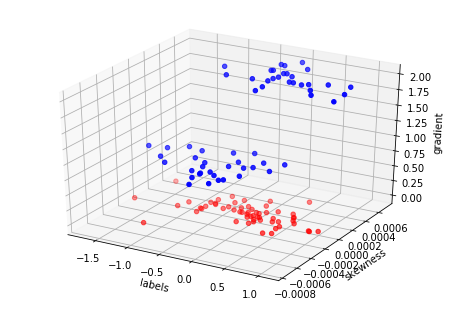

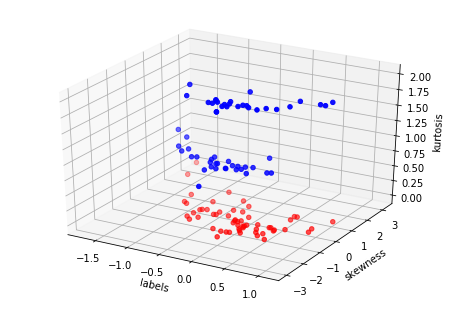

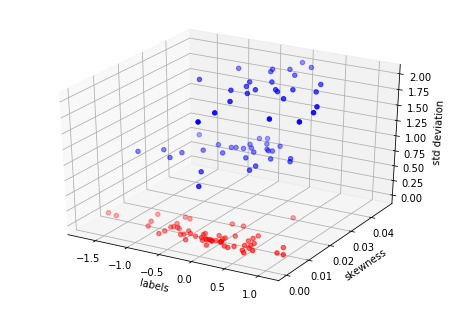

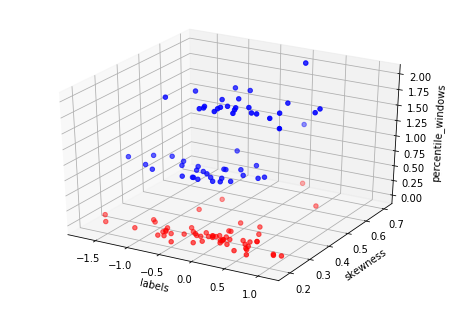

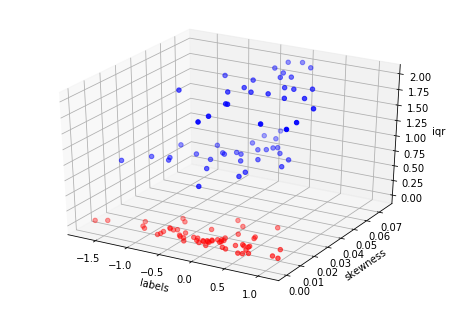

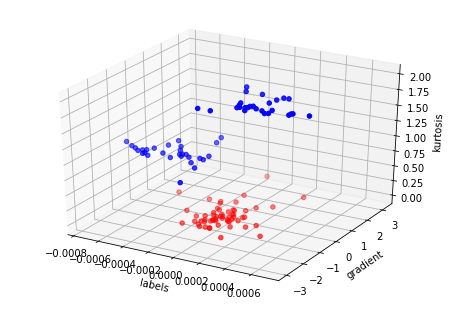

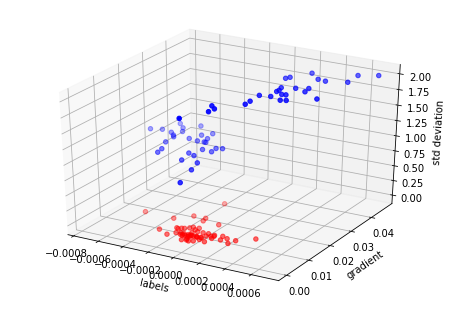

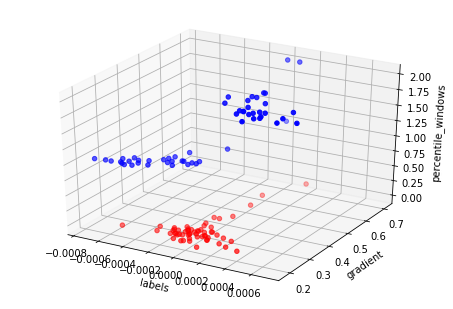

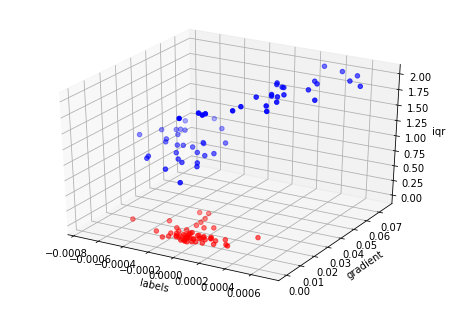

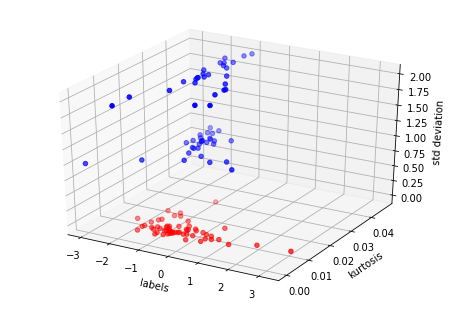

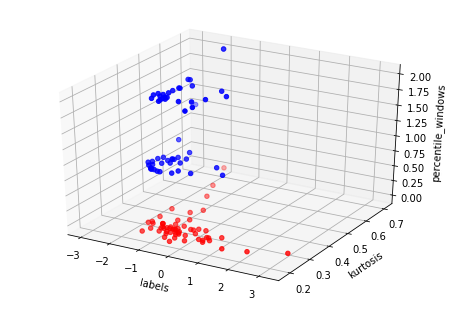

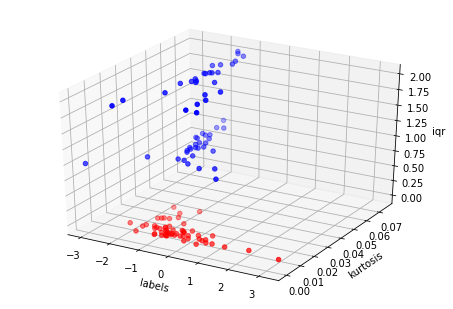

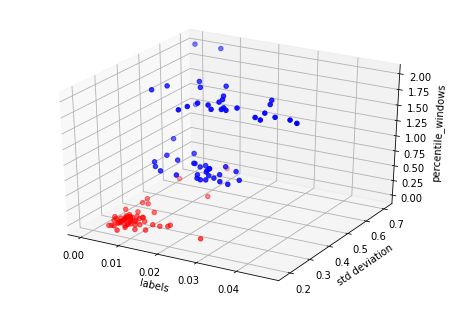

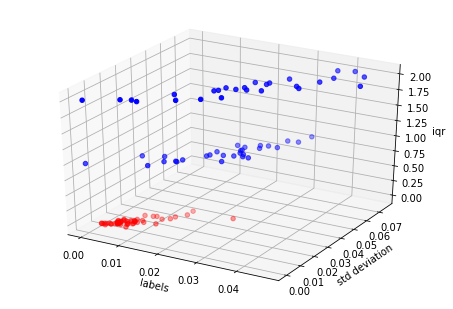

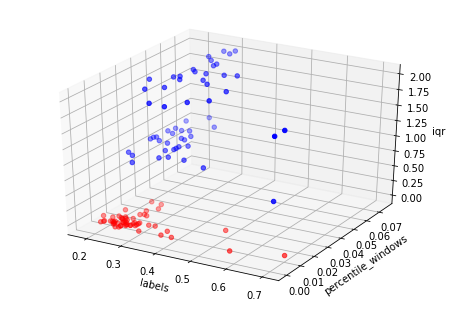

In [38]:
from mpl_toolkits.mplot3d import Axes3D
for combo in combos:
    fig = plt.figure()
    ax = Axes3D(fig)
#     ax.scatter(windows_map[combo[0]]['values'][:len(skewness_w_windows)], windows_map[combo[1]]['values'][:len(skewness_w_windows)], windows_map[6]['values'][:len(skewness_w_windows)], c='r')
    ax.scatter(windows_map[combo[0]]['values'], windows_map[combo[1]]['values'], windows_map[6]['values'], c=[(lambda x:'r' if x==0 else 'b')(x) for x in windows_map[6]['values']])
#     ax.scatter(windows_map[6]['values'], windows_map[combo[0]]['values'], windows_map[combo[1]]['values'], c=[(lambda x:'r' if x==0 else 'b')(x) for x in windows_map[6]['values']])
    ax.set_xlabel(windows_map[6]['legend'])
    ax.set_ylabel(windows_map[combo[0]]['legend'])
    ax.set_zlabel(windows_map[combo[1]]['legend'])
    plt.show()

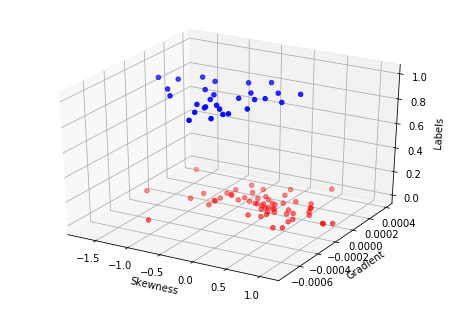

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(skewness_windows, sum_derivative_windows, labels, c=[(lambda x:'r' if x==0 else 'b')(x) for x in labels])
ax.set_zlabel('Labels')
ax.set_xlabel('Skewness')
ax.set_ylabel('Gradient')
plt.show()

In [56]:
print(len(windows_map[combo[1]]['values'][:len(skewness_w_windows)]), len(skewness_w_windows))
print(len(windows_map[combo[1]]['values'][len(skewness_w_windows):len(skewness_w_windows) + len(skewness_c_windows)]), len(skewness_c_windows))
print(len(windows_map[combo[1]]['values'][len(skewness_windows)-len(skewness_d_windows):]), len(skewness_d_windows))

58 58
29 29
27 27


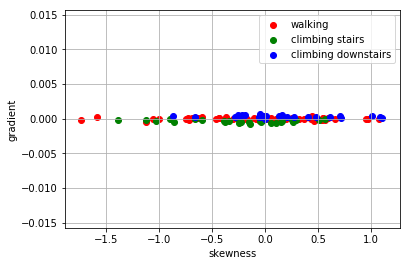

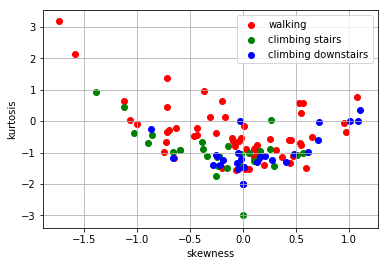

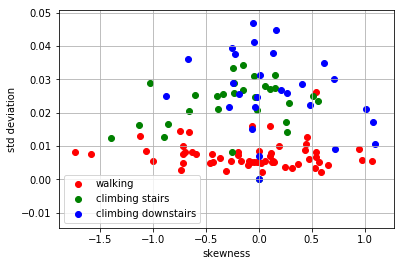

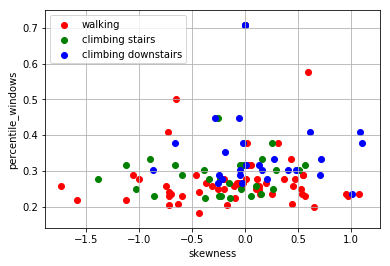

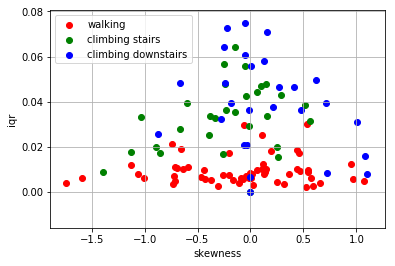

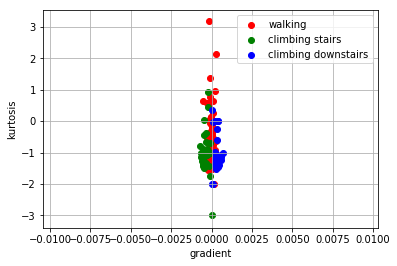

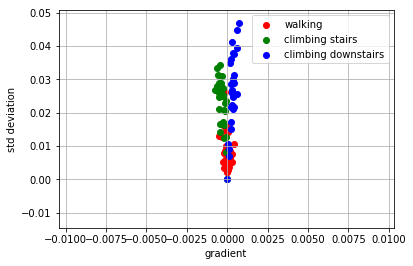

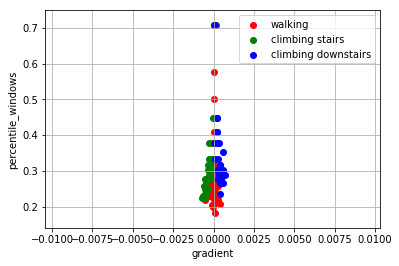

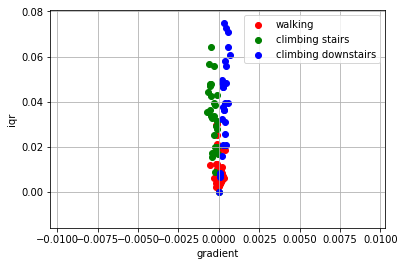

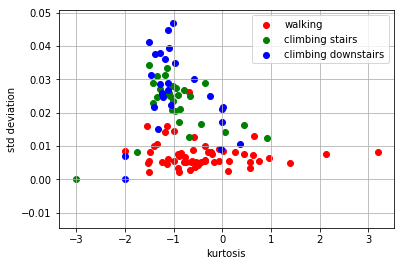

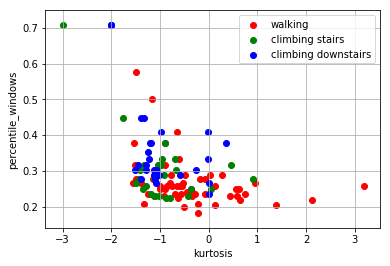

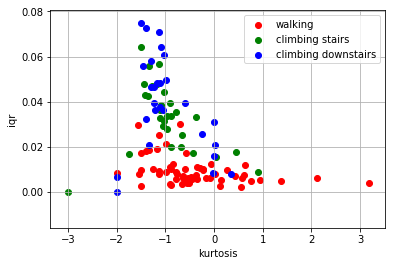

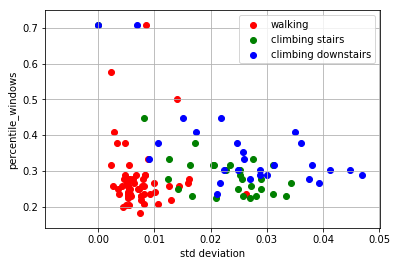

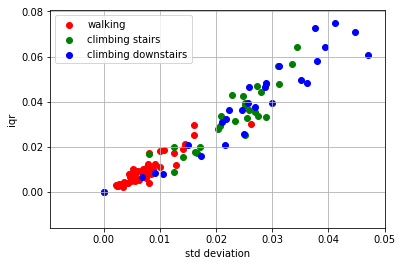

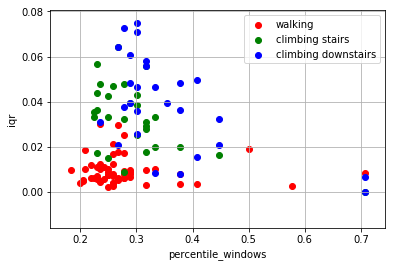

In [53]:
for combo in combos:
#     print(windows_map[combo[0]]['legend'], windows_map[combo[1]]['legend'])
    fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(windows_map[combo[0]]['values'], windows_map[combo[1]]['values'], windows_map[6]['values'], c=[(lambda x:'r' if x==0 else 'b')(x) for x in windows_map[6]['values']])
#     plt.scatter(windows_map[combo[0]]['values'], windows_map[combo[1]]['values'], c=[(lambda x:'r' if x==0 else ('b' if x==1 else 'g'))(x) for x in windows_map[6]['values']], label=[i for i in windows_map[6]])
    plt.scatter(windows_map[combo[0]]['values'][:len(skewness_w_windows)], windows_map[combo[1]]['values'][:len(skewness_w_windows)], c='r', label='walking')
    plt.scatter(windows_map[combo[0]]['values'][len(skewness_w_windows):len(skewness_w_windows) + len(skewness_c_windows)], windows_map[combo[1]]['values'][len(skewness_w_windows):len(skewness_w_windows) + len(skewness_c_windows)],c='g', label='climbing stairs')
    plt.scatter(windows_map[combo[0]]['values'][len(skewness_windows)-len(skewness_d_windows):], windows_map[combo[1]]['values'][len(skewness_windows)-len(skewness_d_windows):], c='b', label='climbing downstairs')
#     plt.scatter(windows_map[combo[0]]['values'][:len(skewness_w_windows)], windows_map[combo[1]]['values'][:len(skewness_w_windows)], windows_map[6]['values'][:len(skewness_w_windows)], c='b')
#     plt.scatter(windows_map[combo[0]]['values'][:len(skewness_w_windows)], windows_map[combo[1]]['values'][:len(skewness_w_windows)], windows_map[6]['values'][:len(skewness_w_windows)], c='g')    
    ax = plt.subplot()
    ax.set_xlabel(windows_map[combo[0]]['legend'])
    ax.set_ylabel(windows_map[combo[1]]['legend'])
    ax.legend()
    ax.grid(True)
#     plt.set_xlabel(windows_map[combo[0]]['legend'])
#     plt.set_ylabel(windows_map[combo[1]]['legend'])
#     plt.axes(windows_map[combo[0]]['legend'])
#     plt.axes(windows_map[combo[1]]['legend'])
    plt.show()

In [58]:
a=list(range(10))
print(a[:3],a[3:7],a[7:])

[0, 1, 2] [3, 4, 5, 6] [7, 8, 9]
